## Ulam's Spiral



[From the Wikipedia page on ulam's Spiral.](https://en.wikipedia.org/wiki/Ulam_spiral)

We generate the integers in a spiral pattern, as follows:

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from functools import cache


def record_curr (curr, ctr, seq, make_grid=False):
    """
    `ctr` represents the integer currently being
    considered and `curr` its coord on the x,y plane.
    
    `seq` is the sequence of integers found thus far.
    
    when `make_grid=True`, `ctr == len(seq)`.  When
    `make_grid=False` `seq` contains only the primes
    found thus far.
    """
    if make_grid or is_prime(ctr):
        seq.append(tuple(curr))
    ctr += 1
    return ctr

def record_curr_test (curr, ctr, seq, test, make_grid=False,):
    """
    `ctr` represents the integer currently being
    considered and `curr` its coord on the x,y plane.
    
    `seq` is the sequence of integers found thus far.
    
    when `make_grid=True`, `ctr == len(seq)`.  When
    `make_grid=False` `seq` contains only the primes
    found thus far.
    """
    if make_grid or test(ctr):
        seq.append(tuple(curr))
    ctr += 1
    return ctr

def ulams_spiral (N,ctr=0,make_grid=False):
    """
    Generates the x,y coords of an  integer grid G in 
    spiral order. Let Gi be the i-th point generated.
    With make_grid=False, generates only the Gi
    where i is prime, which is called Ulam's spiral.
    With make_grid=True, all Gi are generated.
    
    The spiral has straight line sides that make right angle
    counterclockwise turns. It is a spiral because the length
    of the sides is increased by one every other turn.  
    N is the number of straight lines. So with N=8, using
    r, u, l, d for directions right, up, left, down, and
    (<dir>, <len>) for a line drawn in direction <dir> with
    length <len>), we do
    
       (r, 1) (u, 1) (l, 2) (d, 2)
       (r, 3) (u, 3) (l, 4) (d, 4)
       
    When all Gi are generated (`make_grid = True`), the number of 
    (x,y) coords generated is the sum of the step lengths plus one 
    for the starting point at the origin. So for the 8 lines above,  
    21 points are generated with  `make_grid=True`.
    """
    drctns = ("r","u","l","d")
    layer = 0
    #contains coords of the current point 
    curr = [0,0]
    # the sequence of coors to be returned
    seq = [ ]
    # Add curr to seq (if contraints met) update ctr of number of points
    ctr = record_curr(curr, ctr, seq, make_grid)
    for i in range(N):
        d = drctns[i%4]
        if d in ("r","l"):
            layer += 1
        for _ in range(layer):
            if d == "l":
                curr[0] -= 1
            elif d == "r":
                curr[0] += 1
            elif d == "u":
                curr[1] += 1
            elif d == "d":
                curr[1] -= 1
            # print(d)
            ctr = record_curr(curr, ctr, seq, make_grid)
    return seq

def ulam_with_test(N,test,ctr=0,make_grid=False):
    drctns = ("r","u","l","d")
    layer = 0
    #contains coords of the current point 
    curr = [0,0]
    # the sequence of coors to be returned
    seq = [ ]
    # Add curr to seq (if contraints met) update ctr of number of points
    ctr = record_curr_test(curr, ctr, seq, test=test,make_grid=make_grid)
    for i in range(N):
        d = drctns[i%4]
        if d in ("r","l"):
            layer += 1
        for _ in range(layer):
            if d == "l":
                curr[0] -= 1
            elif d == "r":
                curr[0] += 1
            elif d == "u":
                curr[1] += 1
            elif d == "d":
                curr[1] -= 1
            # print(d)
            ctr = record_curr_test(curr, ctr, seq, test=test,make_grid=make_grid)
    return seq

def ulams_spiral_2 (N,ctr=0,make_grid=False):
    """
    This version breaks the sequence into subsesquences
    each of which represents an arm of teh integer spiral.
    """
    drctns = ("r","u","l","d")
    layer = 0
    #contains coords at which the current point would appear
    curr = [0,0]
    full_seq, seq = [ ], [tuple(curr)]
    ctr = record_curr(curr, ctr, seq, make_grid)
    for i in range(N):
        d = drctns[i%4]
        if d in ("r","l"):
            layer += 1
        #print(seq)
        #print(full_seq)
        #print()
        for _ in range(layer):
            if d == "l":
                curr[0] -= 1
            elif d == "r":
                curr[0] += 1
            elif d == "u":
                curr[1] += 1
            elif d == "d":
                curr[1] -= 1
            # print(d)
            ctr = record_curr(curr, ctr, seq, make_grid)
        full_seq.append(seq)
        seq = []
    return full_seq


@cache
def is_prime(n):
  """
  some simple fast heuiristics, then uses the fact 
  all primes greater than 3 are of the form 6n +- 1.
  """
  if n == 2 or n == 3: return True
  if n < 2 or n%2 == 0: return False
  if n < 9: return True
  if n%3 == 0: return False
  r = int(n**0.5)
  # since all primes > 3 are of the form 6m ± 1
  # start with f=5 (which is prime)
  # and test f, f+2 for being prime
  # then loop by 6. 
  f = 5
  while f <= r:
    #print('\t',f)
    if n % f == 0: return False
    if n % (f+2) == 0: return False
    f += 6
  return True   

def is_square (n):
    return np.sqrt(n)%1 == 0

def N2n (N):
    res,i = 1,0
    for ctr in range(N):
        if ctr%2 == 0:
            i +=1
        res += i
    return res

def N2n_closed_form(N,round_it=True):
    """
    Equivalent to N2n but uses a closed form 
    expression and rounding. Explained in appendix.
    """
    val = -1 + np.sqrt(4*N -3)
    if round_it:
        return round(val)
    else:
        return val



def set_up_axis (xmin=-5,xmax=5,ymin=-4,ymax=5.5,figsize=(5,5)):
    (fig,ax) = plt.subplots(1,1,figsize=figsize)
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xticks([])
    ax.set_yticks([])
    return ax


def make_integer_spiral (N=30,ctr=1,size=8,bound=10,figside=8,ymin=None,test=None,
                         ax=None,text_color="k",linewidth=1):
    #N=15 for ez2read plot
    x,y = zip(*ulams_spiral(N,make_grid=True))
    if ax is None:
        axis_params =dict(figsize=(figside,figside),
                          xmin=-bound,
                          xmax=bound,
                          ymin = -bound,
                          ymax=bound)
        if ymin is not None:
            axis_params["ymin"] = ymin
        ax = set_up_axis (**axis_params)
    for (i,x_crd) in enumerate(x):
        ax.plot(x[i:i+2],y[i:i+2],c="k",linewidth=linewidth)
        if test is not None and test(i+1):
            ax.annotate(f"{i+ctr}",xy=(x_crd,y[i]),xytext=(1,3),size=size,textcoords="offset points",
                       color=text_color)
        elif test is None:
            ax.annotate(f"{i+ctr}",xy=(x_crd,y[i]),xytext=(1,3),size=size,textcoords="offset points",
                       color=text_color)
    return ax,x,y

def pretty_picture(N=200,c="aqua",s=10,lw=.5,F=1):
    """
    Try:
    
      pretty_picture(c="k",s=5,lw=1)
      pretty_picture(N=400,c="k",s=3,lw=1,F=2)
      pretty_picture(N=600,c="k",s=6,lw=1,F=2)
    """
    #fontsize, plot bounds 
    size,lim=5,50
    R = N/200
    lim = F*np.sqrt(N/200) * lim
    ax = set_up_axis (xmin=-lim,xmax=lim,ymin=-lim,ymax=lim,figsize=(12,12))
    full_seq = ulams_spiral_2(N,make_grid=True)
    last_x,last_y = (0,),(0,)
    for (i,seq) in enumerate(full_seq):
        x,y = zip(*seq)
        if is_prime(i):
            ax.scatter(x,y,c="k",s=s)
        # pretty but too many lines.  Need to break up
        # points in to  sides
        if i%2==1:
            ax.plot(last_x + x,last_y+y,c=c,linewidth=lw)
        else:
            ax.plot(last_x + x,last_y+y,c=c,linestyle="dashed",linewidth=lw)
        last_x,last_y = (x[-1],),(y[-1],)
    return ax
    
def find_tier (n,ctr=0, N=10_000):
    """
    Given an integer return the tier it appears
    on in ulam's spiral.
    """
    drctns = ("r","u","l","d")
    layer = 0
    #contains coords of the current point 
    curr = [0,0]
    # the sequence of coors to be returned
    seq = [ ]
    # Add curr to seq (if contraints met) update ctr of number of points
    #ctr = record_curr(curr, ctr, seq, make_grid=True)
    ctr=0
    tier = 0
    for i in range(N):
        d = drctns[i%4]
        if d == "r":
            tier += 1
        if d in ("r","l"):
            layer += 1
        for _ in range(layer):
            if d == "l":
                curr[0] -= 1
            elif d == "r":
                curr[0] += 1
            elif d == "u":
                curr[1] += 1
            elif d == "d":
                curr[1] -= 1
            # print(d)
            ctr = record_curr(curr, ctr, seq, make_grid=True)
            #print(i, ctr,d,tier,"xx")
            if ctr >= n:
                break
        if ctr >= n:
            break
    return tier   

def print_diag_sample (f, quad, m=10):
    banner = f"Tier | Diagonal Elem ({quad})"
    print(banner)
    print("="*len(banner))
    for i in range(1, m):
        print(f"{i}    |         {f(i):>3}")

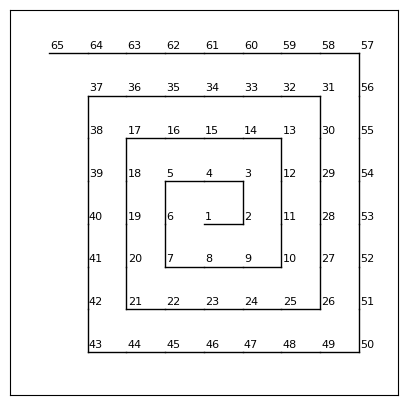

In [2]:
_ = make_integer_spiral(N=15,bound=5,figside=5,ymin=-4)

In [74]:
f = lambda i: 4*i**2 - 2*i - 1
print_diag_sample (f, "NE")

Tier | Diagonal Elem (NE)
1    |           1
2    |          11
3    |          29
4    |          55
5    |          89
6    |         131
7    |         181
8    |         239
9    |         305


In [72]:
f3 = lambda x: 4*x**2 + 6*x + 1
print_diag_sample (f3, "NE",m=20)

Tier | Diagonal Elem (NE)
1    |          11
2    |          29
3    |          55
4    |          89
5    |         131
6    |         181
7    |         239
8    |         305
9    |         379
10    |         461
11    |         551
12    |         649
13    |         755
14    |         869
15    |         991
16    |         1121
17    |         1259
18    |         1405
19    |         1559


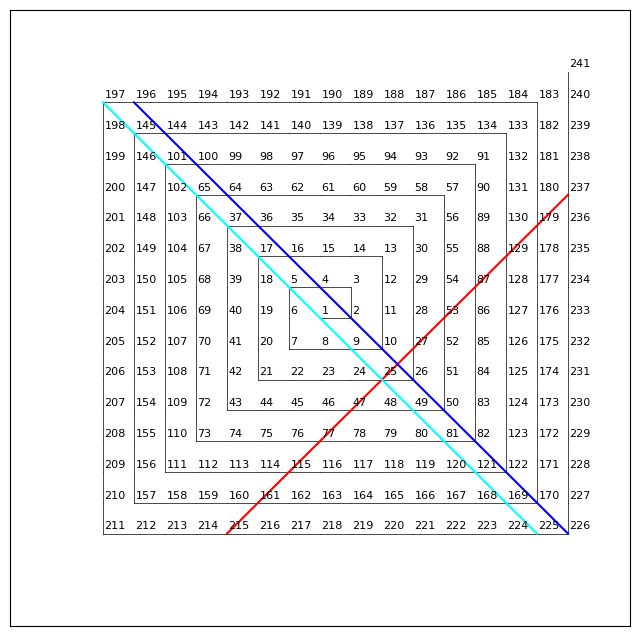

In [17]:
ax,x,y = make_integer_spiral(linewidth=.5)
coords = zip(x,y)

# add diagonals
ddm = {i:pt for (i,pt) in enumerate(coords,start=1)}
for (ends,col) in [([215,237],"r"),([197,225],"aqua"),([196,226],"blue")]:
    filtered_x, filtered_y = zip(*[ddm[i] for i in ends])
    ax.plot(filtered_x,filtered_y,color=col)

Let's introduce some terminology for dissecting integer spirals.  We call the integers at which the right angled turns happen **corner integers**.  Thus 43, 101, 226 and 241 are corner integers.
We will call the straight side connecting two corners an **arm**.
So for example the integers 157-169 make up an arm.  We adopt the convention that each arm contains
only one corner integer, the lesser of the two corner integers it connects.  Consider two arms A and B such that Arm A contains integers $i, i+1, \dots , k$ and  Arm B contains $k+1, \dots , j$.  We call Arm B the **successor** of arm A and A the **predecessor** of B.  When a successor is horizontal it contains one more integer than its
predecessor.  The first horizontal arm contains only 1 and is succeeded by arm 2, which contains only 2; arm 2 is succeeded by a horizontal arm that contains two integers, 3 and 4.
The vertical arm 37-42 (6 integers) is suceeded by the horizontal arm 43-39 (7 integers).

Each arm has a natural direction, the direction in which the integers increase.  So the first arm (with 1 on it) goes **right** and the second **up**, the third **left** and the fourth **down**. We will call a sequence
of 4 successive arms a **tier**. And will adopt the convention established by the first arm, that a tier begins with a rightward arm.  Note that any sequence of 4 successive arms, tier or not, contains exactly one odd perfect square and one even perfect square.

Much of the discussion below will center on the idea of **diagonals**  through the spiral.  We will
focus on diagonals that pass through exactly two integers on each tier and connect the $i$th integer of arm $m$ with the $i$th integer of arm $m+4$.  Thus the $i$-$i$ connection links two arms with the same direction.
Consider the rightward arm that contains 77; counting from the first element of that arm (73), 77 is the 5th element. The diagonal connecting 77 to the fifth element of the arm just below it (115) leans rightward  at approximately a 45 degree angle, i.e., it has positive slope (this diagonal is the red line in the plot above) It also passes through 47 and 25 on horizontal arms 13 and 9; 47 and 25 are also the fifth elements on their arms. The same diagonal then intersects an upward arm (arm 10) at 27 and continues on through 53 and 87; That diagonal thus intersects the tier containing 77 at two points, 77 and 87.

If we start on  the leftward arm containing 141, the 9th of its elements, and connect 141 with 191, element 9 on the next leftward arm, we get another diagonal with positive slope.

If use a vertical arm for an $i$-to-$i$ connection, we get a diagonal with negative slope.
For example, connect 5, the first element of arm 4, with 17, the first
element of arm 8. That defines a leftward leaning diagonal that connects only corner integers, which contains the odd perfect squares in the southeast quadrant. This diagonal is shown in aqua.  Note that the parallel diagonal immediately to its right (shown in blue) contains the even perfect squares in the northwest quadrant.  We can see that this is a  an $i$-to-$i$ diagonal if we trace its intersection with neighboring vertical arms,
at 26 and 50, both of which are at index 1 on their arms.  Alternatively we can use a horizontal arm and negative indices that count back from the last element of an arm. Thus, the even perfect square diagonal connects the -1 element of arm 3  (4) with the -1 elment of arm 7 (16).

Note that any $i$-to-$i$ diagonal can be described two ways, with positive indices or with negative indices. We can
describe the red diagonal with negative indices by using its intersection with a vertical arm. For example,
27 and 53 are at index -4 on their respective arms.  We can
describe the red diagonal with positive indices by using its intersection with a horizontal arm. For example,
47 and 25 are at index 5 on their respective arms.

The following table summarizes the relationship of the sign, the orientation of the arms, and the diagonal slope defined:


| Slope | Arm orientation | Index | Example |
| :- | :- | :- | :- |
| positive | horizontal  | positive | red diagonal |
|          | vertical | negative |
| negative | horizontal       | negative | aqua, blue diagonals |
|  | vertical         | negative |


Let $i$ be tier number (starting our tier numbers with 1). Then

$$
(2i)^2 = 4i^2
$$

is the even square on tier $i$. We can think of this as a polynomial that describes the blue diagonal. It gives all the numbers in the northwest quadrant.  Also

$$
4i^2 - 1
$$

is the blue diagonal offset by one. We can think of this as the polynomial describes the aqua diagonal.
It also gives all the numbers in the northwest quadrant. But now consider

$$
(2i - 1)^2 = 4i^2 - 4i + 1
$$

This is the odd perfect square on tier $i$; but it is also another description of the aqua diagonal.
It describes the numbers in the southeast quadrant.

Blue diagonal, northwest:

In [59]:
f = lambda i: 4*i**2
print_diag_sample (f, "NW")

Tier | Diagonal Elem (NW)
1    |           4
2    |          16
3    |          36
4    |          64
5    |         100
6    |         144
7    |         196
8    |         256
9    |         324


Aqua diagonal, northwest:

In [58]:
f = lambda i: 4*i**2 + 1
print_diag_sample (f, "NW")

Tier | Diagonal Elem (NW)
1    |           5
2    |          17
3    |          37
4    |          65
5    |         101
6    |         145
7    |         197
8    |         257
9    |         325


Aqua diagonal, southeast (the odd perfect squares).

In [56]:
f = lambda i: 4*i**2 - 4*i + 1
print_diag_sample (f, "SE")

Tier | Diagonal Elem (SE)
1    |           1
2    |           9
3    |          25
4    |          49
5    |          81
6    |         121
7    |         169
8    |         225
9    |         289


Blue diagonal, southeast (aqua southeast numbers shifted **up** by 1).

In [66]:
f_b_se = lambda i: 4*i**2 - 4*i + 2
print_diag_sample (f_b_se, "SE")

Tier | Diagonal Elem (SE)
1    |           2
2    |          10
3    |          26
4    |          50
5    |          82
6    |         122
7    |         170
8    |         226
9    |         290


Now let's try a diagonal with positive slope (3,13,31,57, ...), the green diagonal below: 

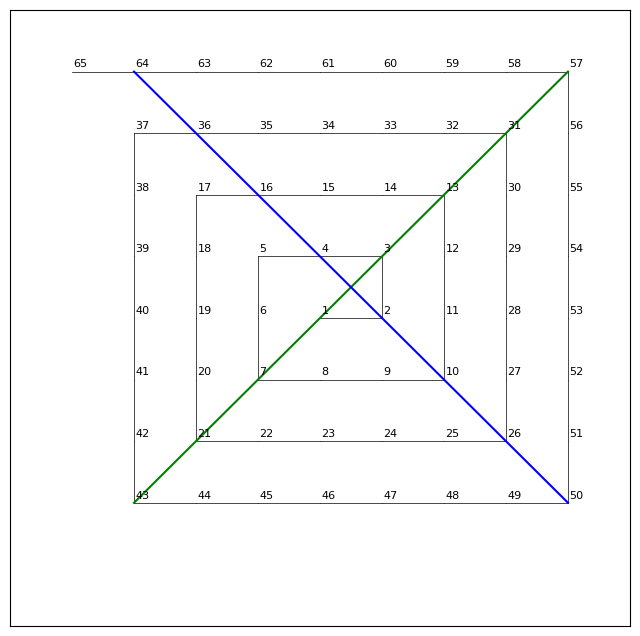

In [65]:
ax,x,y = make_integer_spiral(N=15,bound=5,linewidth=.5)
coords = zip(x,y)

# add diagonals
ddm = {i:pt for (i,pt) in enumerate(coords,start=1)}
for (ends,col) in [([43,57],"g"),([50,64],"b")]:
    filtered_x, filtered_y = zip(*[ddm[i] for i in ends])
    ax.plot(filtered_x,filtered_y,color=col)

Observation.  Each of the numbers we want is the first integer on the same arm as an even perfect square;
The distance increases by 2 on each tier:

$$
(3,13,31,57, ...)= 2^2 - 1, 4^2 - 3, 6^2 -5, 8^2 - 7, ...
$$

If $i$ is the tier, then the negative term is the $i$-th odd number, so we can write the element
on the $i$th  tier as:

$$
(2i)^2  - (2i -1) = 4i^2 -2i +1
$$

Green diagonal, northeast:

In [64]:
f = lambda i: 4*i**2 - 2*i + 1
print_diag_sample (f, "NE")

Tier | Diagonal Elem (NE)
1    |           3
2    |          13
3    |          31
4    |          57
5    |          91
6    |         133
7    |         183
8    |         241
9    |         307


Green diagonal, southwest (Blue diagonal southeast - (2i - 1)):

In [116]:
#f_b_se = lambda i: 4*i**2 - 4*i + 2 - (2*i -1)
#f_g_sw = lambda i: 4*i**2 - 4*i + 2 - 2*i + 1
f_g_sw = lambda i: 4*i**2 - 6*i + 3
print_diag_sample (f_g_sw, "SW")

Tier | Diagonal Elem (SW)
1    |           1
2    |           7
3    |          21
4    |          43
5    |          73
6    |         111
7    |         157
8    |         211
9    |         273


In [81]:
f_b_se = lambda i: 4*i**2 - 4*i + 5
print_diag_sample (f_b_se, "?")

Tier | Diagonal Elem (?)
1    |           5
2    |          13
3    |          29
4    |          53
5    |          85
6    |         125
7    |         173
8    |         229
9    |         293


We can summarize the results of our discussion of polynomial descriptions of diagonals as follows:

1.  Every diagonal can be described with a polynomial of the form:
     
    $$
    4i^2 - bi + c
    $$
    
    with $b$ even and certain values of $c$, dependent on $b$.
2.  If $b = 0$ or $b=4$,the diagonal has negative slope;  if $b=0$ the polynomial generates the numbers in the northwest quadrant. If $b=4$, the polynomial generates the numbers in the southeast quadrant.
3.  If $b = 2$ or $b=6$,the diagonal has positive slope;  if $b=2$ the polynomial generates the numbers in the northeast quadrant. If $b=6$, the polynomial generates the numbers in the southwest quadrant.

Of course the picture is nowhere near as simple as these remarks might suggest.  Firstly the same diagonal
can be described with many polynomials.  For example, the positive even squares are also the range of this function

$$
(2i + 2)^2 = 4i^2 + 8i + 4
$$

The $i$s no longer capture the tier number of the even square $i=1 \mapsto f(i)=16 \dots$, but the entire
range of even squares is generated, just diagonally shifted.   Shifting this function up and down (adding appropriate values to $c$) gives us corresponding diagonally shifted descriptions of other negative sloping diagonals.  

A special case of a diagonal shift is changing the sign of $b$ while leaving $c$ constant.  

There are also many polynomials of the form $ 4i^2 - bi + c$ that don't factor, and have higher
values of $b$ higher than 8 and still describe diagonals in some shifty fashion.  Examples below.
It does seem to be the case (as claimed in the Wikipedia article) that $b$ must be even.

####  Testing diagonals cell

Test candidate diagonal functions here.

Tier | Diagonal Elem (?)
1    |          15
2    |          37
3    |          67
4    |         105
5    |         151
6    |         205
7    |         267
8    |         337
9    |         415
Tier | Diagonal Elem (?)
1    |          17
2    |          39
3    |          69
4    |         107
5    |         153
6    |         207
7    |         269
8    |         339
9    |         417


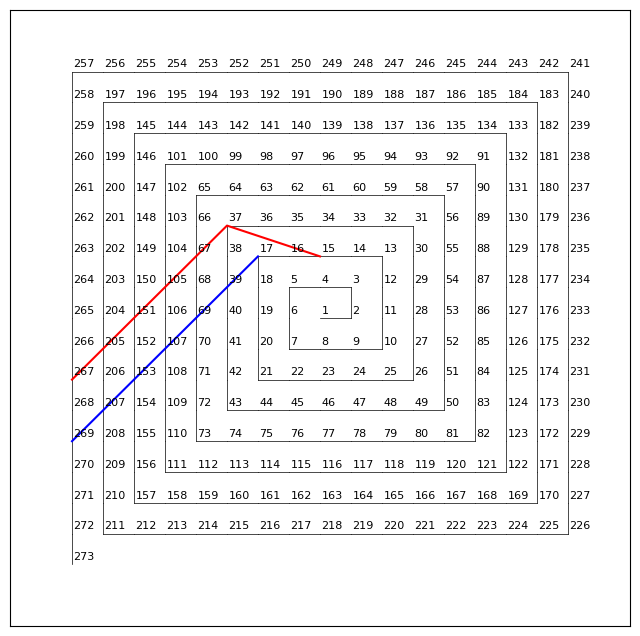

In [115]:
b,c=10,1
f = lambda x: 4*x**2 + b*x + c
ints1 = [f(i) for i in range(1,8)]
print_diag_sample (f, "?")

b,c=10,3
f = lambda x: 4*x**2 + b*x + c
ints2 = [f(i) for i in range(1,8) if f(i)>0]
print_diag_sample (f, "?")


ax,x,y = make_integer_spiral(N=32,linewidth=.5)
coords = zip(x,y)

# add diagonals
ddm = {i:pt for (i,pt) in enumerate(coords,start=1)}
for (ends,col) in [(ints1,"r"), (ints2,"b"),]:
    filtered_x, filtered_y = zip(*[ddm[i] for i in ends])
    ax.plot(filtered_x,filtered_y,color=col)

##  The main point

Let's call the number of arms in a plot N.  Note that with N = 200, over 10_000 points are generated, so to generate only 65 for the plot above, we used `N=15`.

If we increase N and  print only the primes in the spiral, we see an interesting pattern.  Many primes are
arranged along diagonal lines. Sometimes a single prime falls on both leftward leaning and rightward leaning diagonals.  Some fall on horizontal lines.

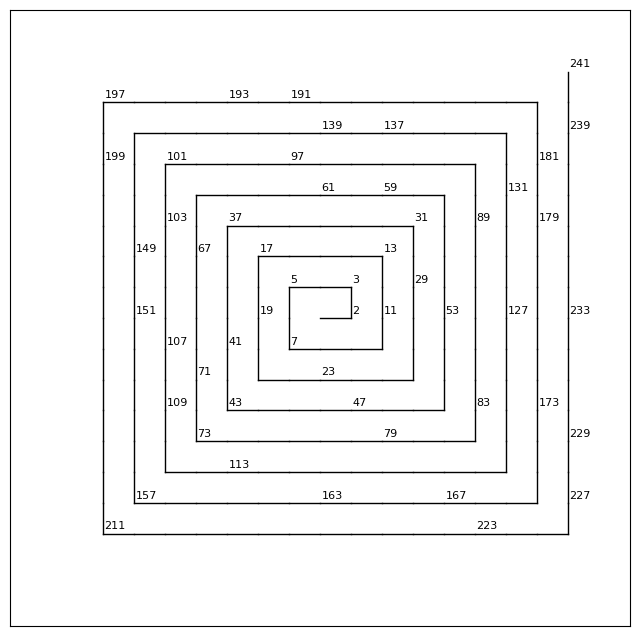

In [13]:
_ = make_integer_spiral(test = is_prime)

Crank `N` up to 200, and just scatterplot the prime integers as points on the spiral:

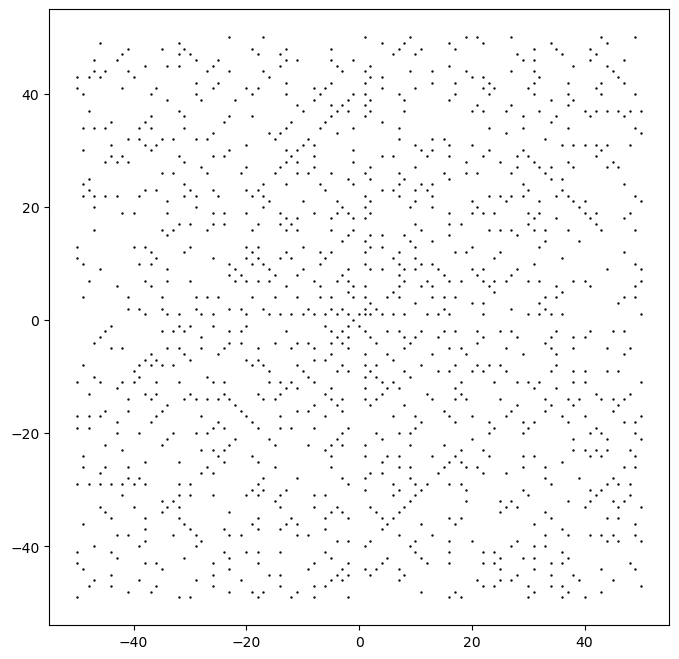

In [44]:
(fig,ax) = plt.subplots(1,1,figsize=(8,8))
N=200
x,y = zip(*ulams_spiral(N))
plt.scatter(x,y,c="k",s=.5)
# pretty but too many lines.  Need to break up
# points in to  sides
#plt.plot(x,y)
plt.show()

It's easy for the eye to convince you that the diagonal lines appearing above are arms of the spiral, but they're not.  That's what so mystical.  Adding back in the lines in the spiral:

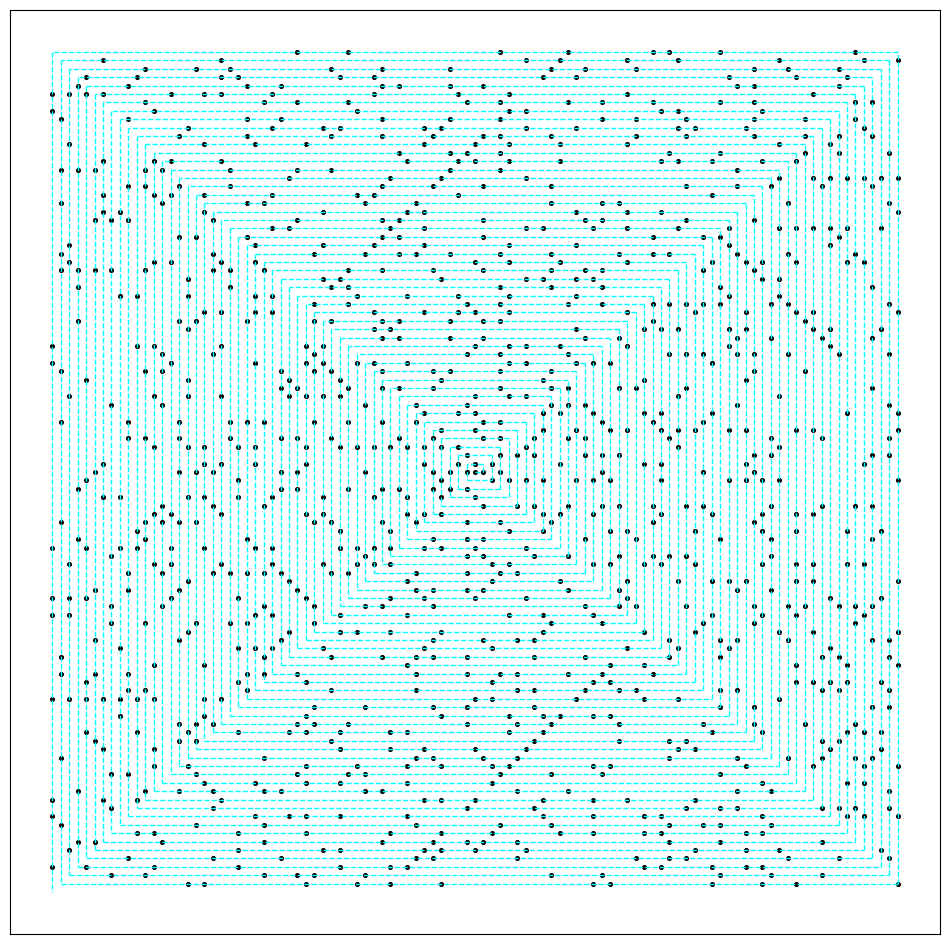

In [146]:

size,lim=5,55
ax = set_up_axis (xmin=-lim,xmax=lim,ymin=-lim,ymax=lim,figsize=(12,12))
N=200
full_seq = ulams_spiral_2(N,make_grid=True)
last_x,last_y,ctr = (0,),(0,),0
#add_squares = True
add_squares = False

for (i,seq) in enumerate(full_seq):
    x,y = zip(*seq)
    for (j,xelem) in enumerate(x):
        ctr += 1
        if add_squares and is_square(ctr):
            ax.scatter(xelem,y[j],c="r",s=7)
        elif is_prime(ctr):
            ax.scatter(xelem,y[j],c="k",s=7)
    ax.plot(last_x + x,last_y+y,c="aqua",linestyle="--",linewidth=1)
    last_x,last_y = (x[-1],),(y[-1],)
plt.show()

We see first that many of teh priomes are dense on the 45-degree angle ($i$-to-$i$) diagnonals described
above, although there are some taht seem to crowd onto horizontal lines as well.

We see that even the horizontal lines do not coincide with a single arm.  Rather most cut across muliple
vertical arms.

What do these diagonals mean?

Let's plot another number property, being a perfect square, on the same spiral.
We know that perfect squares do follow a well-known spacing rule:

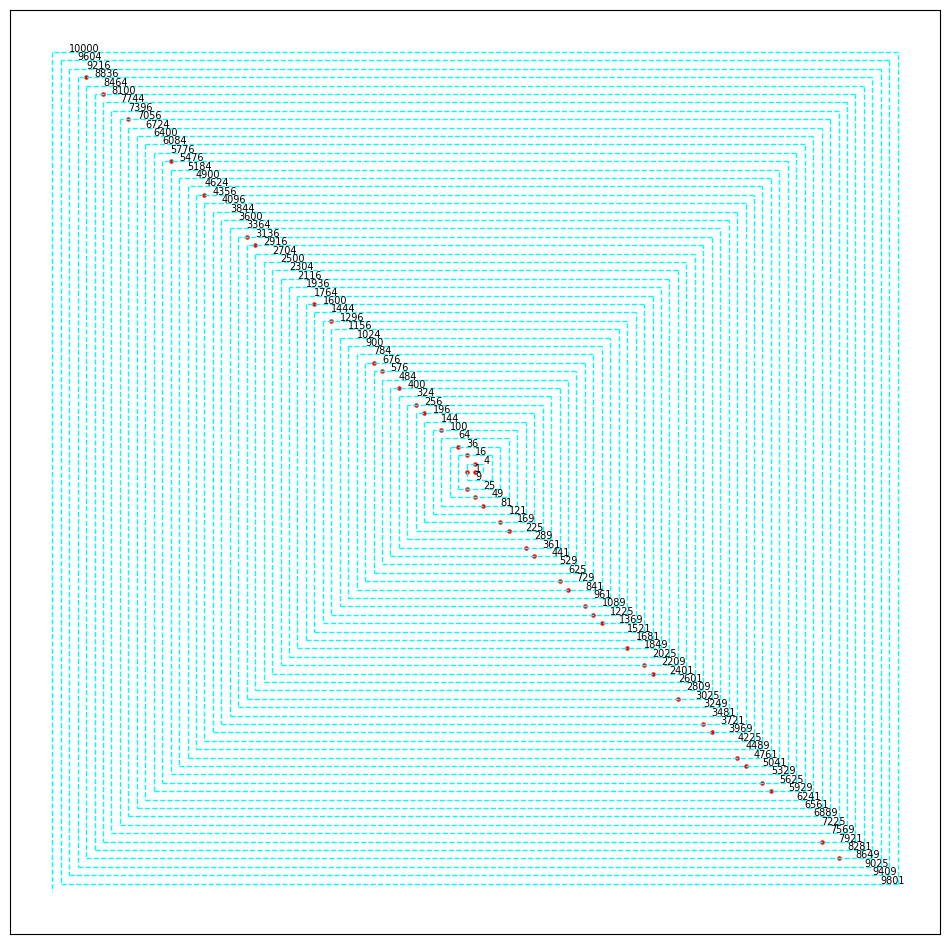

In [225]:
size,lim=5,55
ax = set_up_axis (xmin=-lim,xmax=lim,ymin=-lim,ymax=lim,figsize=(12,12))
N=200
full_seq = ulams_spiral_2(N,make_grid=True)
last_x,last_y,ctr = (0,),(0,),0
for (i,seq) in enumerate(full_seq):
    x,y = zip(*seq)
    for (j,xelem) in enumerate(x):
        ctr += 1
        if is_square(ctr):
            #ax.scatter(xelem,y[j],c="k",s=9)
            plt.text(xelem,y[j],f"{ctr}",size=7)
        elif is_prime(ctr):
            if is_square(ctr-1) or is_square(ctr+2):
                plt.scatter(xelem,y[j],s=5,c="r")
    ax.plot(last_x + x,last_y+y,c="aqua",linestyle="--",linewidth=1)
    last_x,last_y = (x[-1],),(y[-1],)
plt.show()

The red dots are primes that are 1 more than an even perfect square, or 2 less than an odd perfect square.
As shown in the picture above, the perfect squares fall on two adjacent diagonals (the blue and aqua diagonals), so the appearance of diagonals containing a high density of primes nearby suggests that these diagonals might be explained in terms of other structural features of the integers.  

For the $nth$ even number, add 1 to the resulting square:

$$
\begin{array}{lcl}
f_{e}(n) & = & (2n)^{2} + 1\\
         & = & 4n^{2} + 1\\
\end{array}
$$

For the $nth$ odd number subtrract two from the resulting square:

$$
\begin{array}{lcl}
f_{o}(n) & = & (2n - 1)^{2} -2\\
         & = & 4n^{2} -4n  -1\\
\end{array}
$$

Since each tier has exactly one odd square and one even square, we can take $n$ to be the tier number

In [330]:
# 2 less than the i-th odd perfect sq; the odd perfect square on the i-th tier
f_o(1), f_o(2), f_o(3)

(-1, 7, 23)

In [422]:
f_o = lambda n: (4*n**2 -4*n -1)
f_e = lambda n: (4*n**2 +1)

tiers = 200
l_o = [f_o(i) for i in range(1,tiers) if is_prime(f_o(i))]
l_e = [f_e(i) for i in range(1, tiers) if is_prime(f_e(i))]
len(l_o), len(l_e)

(76, 56)

The yield is 132 primes

In [426]:
sq_diag = set(l_o).union(l_e)
len(sq_diag)

132

Making this more compact:

In [3]:
def f_from_i (i):
    """
    if m is the ith even perfect square add 1;
    if m is the ith odd perfect square subtract 2
    m = ((2 * i))**2
    m = ((2 * i) - 1)**2
    then
    f_e = m + 1 = (4*i**2 +1)
    f_o = m -2 = 4*i**2 -4*i -1
    """
    f_o = lambda n: (4*n**2 -4*n -1)
    f_e = lambda n: (4*n**2 +1)
    return f_o(i),f_e(i)

def f_from_n (n):  
    m = find_tier(n)
    return f_from_i(m)

In [431]:
tiers = 200 
fd = {p for i in range(1,tiers) for p  in f_from_i(i) if is_prime(p) }
len(fd)

132

#### Euclid's polynomial

$$
n^2 + n + 41
$$

Plug in $n=1 \dots 39$ get the primes.  

In [29]:
f = lambda x: x**2 +x + 41
euclid_primes = [f(x) for x in range(1,40)]
for (i,x) in enumerate(euclid_primes,start=1):
    print(f"{i:>2} {x:>4}  {is_prime(x)}")

 1   43  True
 2   47  True
 3   53  True
 4   61  True
 5   71  True
 6   83  True
 7   97  True
 8  113  True
 9  131  True
10  151  True
11  173  True
12  197  True
13  223  True
14  251  True
15  281  True
16  313  True
17  347  True
18  383  True
19  421  True
20  461  True
21  503  True
22  547  True
23  593  True
24  641  True
25  691  True
26  743  True
27  797  True
28  853  True
29  911  True
30  971  True
31 1033  True
32 1097  True
33 1163  True
34 1231  True
35 1301  True
36 1373  True
37 1447  True
38 1523  True
39 1601  True


Is it a diagonal?

Here are Euclid's primes plotted on the spiral, demonstrating they most definitely do not lie on a single diagonal, although they may be distributed over several with slopes we haven't looked at).

<Axes: >

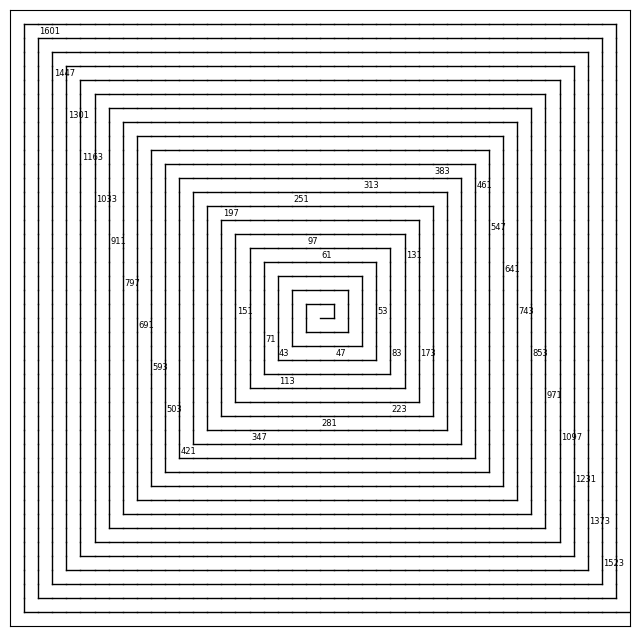

In [33]:
# (n + 2)^2 = n^2 + 4n + 4
# n=2 => (2+2)^2 = 4^2 = 4 + 8 + 4 = 16
euclid_test = lambda x: x in euclid_primes
#make_integer_spiral (N=30,size=8,bound=10,figside=8,ymin=None,test=None):
make_integer_spiral(N=85, bound=22,size=6, figside= 8, test = euclid_test)

### Another approach

Thuis far we have been finding items  .....

There is another more robust approach to finding primes on diagonals.

We see the even perfect squares on one ray, the odd perfect squares on another.

So given $m$, an odd perfect square, the rule to get to the next arm and fall on the same diagonal is:

$$
(A)\;\; m + 4\sqrt{m} + 4,
$$

which will always fall on another odd perfect square. For example for $m=169$

$$
169 + 4\cdot 13 + 4 = 225
$$

Now for a prime $p$ on the same layers as $m$, the distance to the number on the next layer
at the same "slope" will also be $m + 4\sqrt{m} + 4$, so we might look for primes with that relationship,
but of course the expression $m + 4\sqrt{m} + 4$ will be an integer only if $m$ is perfect  square,
so we need to add rounding to the idea.

So the idea is to find a prime $p$, find a nearby perfect square $m$ (on the same tier), and add (A) $p$ to find a candidate prime on the next tier.  The problem is how exactly to define $m$.  Shall we:

$$
\text{round}(p + 4 \sqrt{p} + 4)
$$

which isn't exactly the same as adding the perfect square slope.  Or shall we

$$
p + 4\, \text{round}(\sqrt{p}) + 4
$$

certainly round($\sqrt{p}$)

Below we try both.  Sure enough this generates a ton of primes that lie on diagonals with 45${}^\circ$-slope (the
perfect square "slope", scare quotes explained below).  But note that the vast majority of primes have no
yield by either rule:

In [144]:
# A selection of primes to generate from:
less_than_ten_thousand = [n for n in range(10_001) if is_prime(n)]

# Our two candidate tier-hopping functions
f1 = lambda x: round((x+ 4* np.sqrt(x) +4))
f2 = lambda x: (x+ 4* round(np.sqrt(x)) +4)

ctr1,ctr2 = 0,0
S =set()
for i in range(len(less_than_ten_thousand)):
    p_i = less_than_ten_thousand[i]
    #p_j,p_k = f_from_n(p_i)
    f1val,f2val = f1(p_i),f2(p_i)
    f1_test,f2_test = f1val in less_than_ten_thousand, f2val in less_than_ten_thousand
    if f1_test:
        S.add(f1val)
        ctr1 += 1
    if f2_test:
        S.add(f2val)
        ctr2 += 1
    if f1_test or f1_test:
        #print(f"{p_i:<5} {ff_test:<5} {ffval:<6}  {fg_test:<5} {fgval:<6} {p_j:<6} {p_k:<6}")
        print(f"{p_i:<5} {f1_test:<5} {f1val:<6}  {f2_test:<5} {f2val:<6}")
    else:
        print(f"{p_i}")
        

2
3
5
7
11
13    1     31      0     33    
17    1     37      1     37    
19
23
29
31
37
41    1     71      0     69    
43    1     73      0     75    
47
53
59
61
67
71    1     109     1     107   
73
79
83
89    1     131     0     129   
97
101
103
107
109
113
127
131   1     181     1     179   
137
139
149
151
157   1     211     0     213   
163
167   1     223     1     223   
173
179
181   1     239     0     237   
191
193
197   1     257     1     257   
199
211
223
227
229
233
239
241   1     307     0     309   
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359   1     439     1     439   
367
373
379   1     461     0     459   
383
389
397
401
409
419
421
431
433
439
443
449
457   1     547     0     545   
461
463
467   1     557     0     559   
479   1     571     1     571   
487
491
499
503
509
521
523
541
547
557
563
569
571
577   1     677     1     677   
587
593
599   1     701     0     699   
601
607
613
617
619
631
641
643
647


Rule 1: 138 primes, rule 2: 296 primes.

There's an overlap of 70 primes explained both by rule 1 and rule 2.

In [145]:
len(S),ctr1,ctr2,ctr1+ctr2,ctr1+ctr2 - len(S)

(358, 138, 296, 434, 76)

Nearly thirty percent of the primes sampled yielded a prime by one of the rules:

In [148]:
len(S)/len(less_than_ten_thousand)

0.2912937347436941

The prime 31 is discovered by rule 1, 97 by rule 2.  Neither fall on our **nearly square diagonals**, primarily
because we use primes not on those diagonals as generators.

In [351]:
ff(13),fg(61)

(31, 97)

13 falls between perfect squares 9 and 16. It is not 1 more than an even perfect square, nor 2 less than an odd one; to move up onto the next tier at the perfect square "slope" yields the prime 31, which is likewise
on neither nearly perfect square diagonal. It falls between 25 and 36.   It is not 1 more than an even perfect square, nor 2 less than an odd one.

A picture of rule 2, showing that it discovers a number of diagonals, and simply 
finds primes by cloimbing up those.  Note the red numbers are generator primes
(meaning applying rule 2 has generated another prime), the black numbers are primes generated by rule 2.  The bolded red numbers are both:

<Axes: >

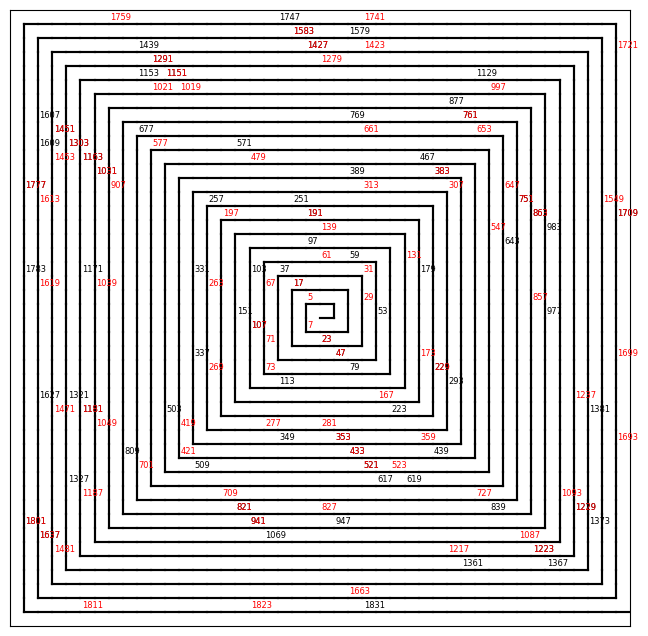

In [65]:
f2 = lambda x: (x+ 4* round(np.sqrt(x)) +4)
f2_vals = [f2(x) for x in less_than_ten_thousand if is_prime(f2(x))]
f2val_test = lambda x: x in f2_vals
f2_xs = [x for x in less_than_ten_thousand if is_prime(f2(x))]
f2x_test = lambda x: x in f2_xs

#mins (N=85, bound=22,size=6, figside= 8, test = euclid_test)
ax,_x,_y  = make_integer_spiral(N=85, bound=22,size=6, figside= 8, test = f2val_test)
make_integer_spiral(N=85, bound=22,size=6, figside= 8, test = f2x_test,ax = ax,text_color="r")

Same picture for rule 1, which is less fertile:

<Axes: >

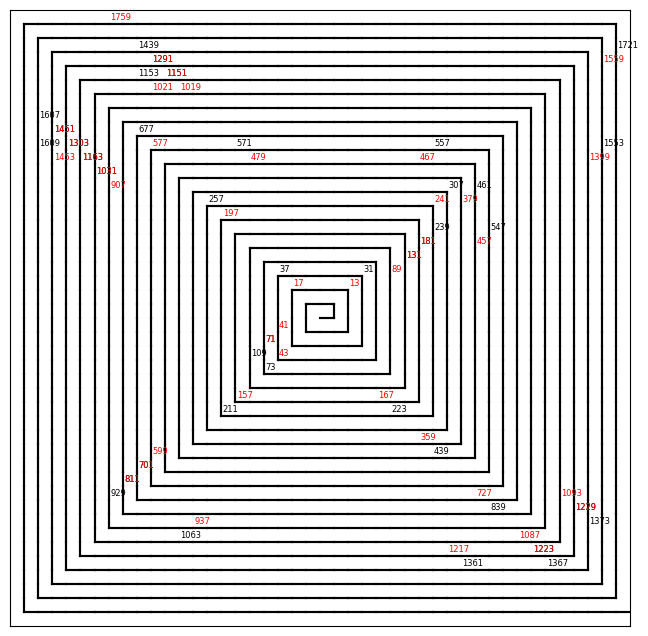

In [69]:
f1 = lambda x: round((x+ 4* np.sqrt(x) +4))
f1_vals = [f1(x) for x in less_than_ten_thousand if is_prime(f1(x))]
f1val_test = lambda x: x in f1_vals
f1_xs = [x for x in less_than_ten_thousand if is_prime(f1(x))]
f1x_test = lambda x: x in f1_xs

#mins (N=85, bound=22,size=6, figside= 8, test = euclid_test)
ax,_x,_y = make_integer_spiral(N=85, bound=22,size=6, figside= 8, test = f1val_test)
make_integer_spiral(N=85, bound=22,size=6, figside= 8, test = f1x_test,ax = ax,text_color="r")

### Quadratic polynomial description

Related to the exploration above:
The Wikipedia article says that all Ulam spiral diagonals can be described by 
quadratic polynomials of the form:

$$
{\displaystyle 4n^{2}+bn+c}
$$

and takes particular note of

$$
{\displaystyle 4n^{2}+6n+1}
$$

arguing that one might expect a high density of primes on this diagonal.

Wikiepedia says: "Rays emanating from the central region of the Ulam spiral making angles of 45° with the horizontal and vertical correspond to numbers of the form $4x^{2} + bx + c$ with $b$ even."

Let's look at the general issue of describing diagonals  with polynomial functions of the
for $4n^2 + bn + c$, with $b$ even.  

We observe $c$ must be odd to produce odd values, even for even values:

Here are some example diagonals:

In [4]:

# Main diagonal to lower left corner
# [1, 7, 21, 43, 73, 111, 157, 211, 273, 343]
#b,c = 2,1
# the even squares diagonal
#b,c = 0,0
# the even squares +1 diagonal (main diag) (prime dense)
#b,c = 0,1
# The odd squares diagonal  (derivation above)
#b,c = -4,1 
# The odd squares -2 diagonal  (prime dense)
#b,c = -4, -1
f = lambda x: 4*x**2 + b * x + c
[f(i) for i in range(10)]

[1, 3, 13, 31, 57, 91, 133, 183, 241, 307]

Practice exercise: what quadratic function gives the upper right main diagonal (1,3,13,31,57,91,...)?

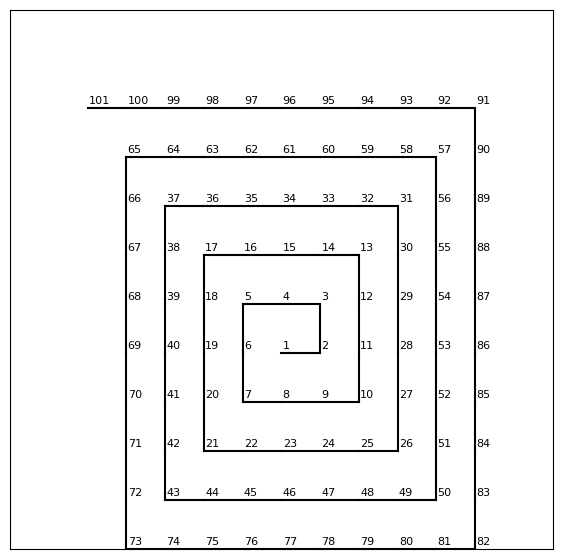

In [409]:
make_integer_spiral(N=19,bound=7,figside=7,ymin=-4)

Observation:

$$
(3,13,31,57, ...)= 2^2 - 1, 4^2 - 3, 6^2 -5, 8^2 - 7, ...
$$

Can write the $i$th term as:
$$
(2i)^2  - (2i -1) = 4i^2 -2i +1
$$

Hence:
b,c = -2,1

In [139]:
b,c = -2,1
[f(i) for i in range(10)]

[1, 3, 13, 31, 57, 91, 133, 183, 241, 307]

In [149]:
b,c = -2,2
[f(i) for i in range(10)]

[2, 4, 14, 32, 58, 92, 134, 184, 242, 308]

Not that prime-dense:

In [5]:
b,c = -2,1
N=10_000
yd_m2_1=[f(i) for i in range(N) if is_prime(f(i))]
print(len(yd_m2_1), len(yd_m2_1)/N)

1272 0.1272


This is the red diagonal shown below, which is simply the green diagonal discussed above, diagonally shifted by 1 and shifted down by 2.

Tier | Diagonal Elem (green)
1    |           3
2    |          13
3    |          31
4    |          57
5    |          91
6    |         133
7    |         183
8    |         241
9    |         307
Tier | Diagonal Elem (red)
1    |          11
2    |          29
3    |          55
4    |          89
5    |         131
6    |         181
7    |         239
8    |         305
9    |         379


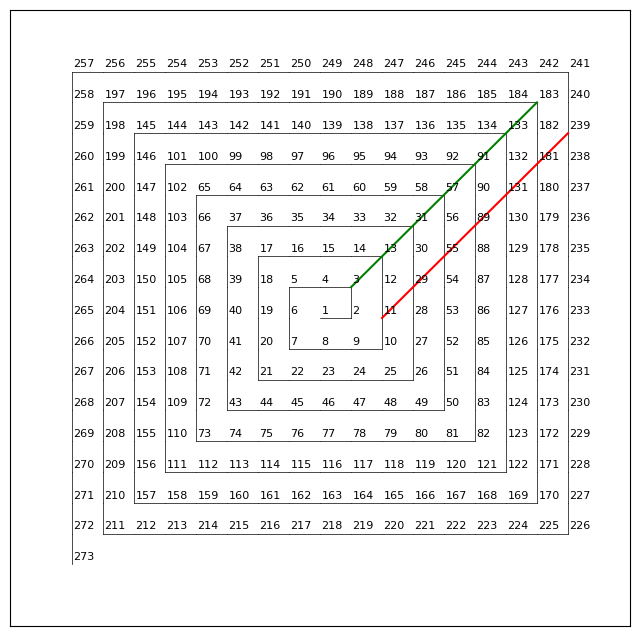

In [147]:
b,c = -2,1
fg = lambda i: 4*i**2 - 2*i + 1
ints = [fg(i) for i in range(1,8) if fg(i)>0]
print_diag_sample (fg, "green")


b,c=6,1
fr = lambda x: 4*x**2 + b*x + c
ints2 = [fr(i) for i in range(1,8) if fr(i)>0]
print_diag_sample (fr, "red")


ax,x,y = make_integer_spiral(N=32,linewidth=.5)
coords = zip(x,y)

# add diagonals
ddm = {i:pt for (i,pt) in enumerate(coords,start=1)}
for (ends,col) in [ (ints,"g"),(ints2,"r"),]:
    filtered_x, filtered_y = zip(*[ddm[i] for i in ends])
    ax.plot(filtered_x,filtered_y,color=col)

Computing $fr$ in terms of a diagonal shift of 1 of $fg$ followed by shift down of 2:

$$
\begin{array}{lcl}
fr(i) & =  & \lbrack fg(i+1) \rbrack - 2\\
      & =  & \lbrack 4(i+1)^2 - 2(i + 1) + 1 \rbrack -2\\
      & = & 4i^2 + 8i + 4 -2i -2 +1 -2 \\
      &=&  4i^2 + 6i  +1 \\
\end{array}
$$

which is the given definition of $fr$.

Let's take $fr$ for a long ride:

In [113]:
f3 = lambda x: 4*x**2 + 6*x + 1
# max val prime found is 399,820,019
N = 10_000
f3_vals = [f3(x) for x in range(N) if is_prime(f3(x))]
print(f"{len(f3_vals):,} primes found. Density: {len(f3_vals)/N:.2f} Max: {f3_vals[-1]:,}")

1,992 primes found. Density: 0.20 Max: 399,820,019


This takes a LOT longer.  The density goes down, as expected.

In [114]:
N = 100_000
f3_vals = [f3(x) for x in range(N) if is_prime(f3(x))]
print(f"{len(f3_vals):,} primes found. Density: {len(f3_vals)/N:.2f} Max: {f3_vals[-1]:,}")

16,063 primes found. Density: 0.16 Max: 39,983,801,639


A much denser diagonal (from Wikipedia)

In [79]:
b,c=-2,41
fdense = lambda x: 4*x**2 + b*x + c
N=10_000
yd_m2_41=[f(i) for i in range(N) if is_prime(f(i))]
print(len(yd_m2_41), len(yd_m2_41)/N)

3784 0.3784


The max prime found

In [20]:
yd_m2_41[-1]

399420251

A partial picture.   These numbers do not form a diagonal if the spiral starts with 1. 

Tier | Diagonal Elem (magenta)
1    |          43
2    |          53
3    |          71
4    |          97
5    |         131
6    |         173
7    |         223
8    |         281
9    |         347


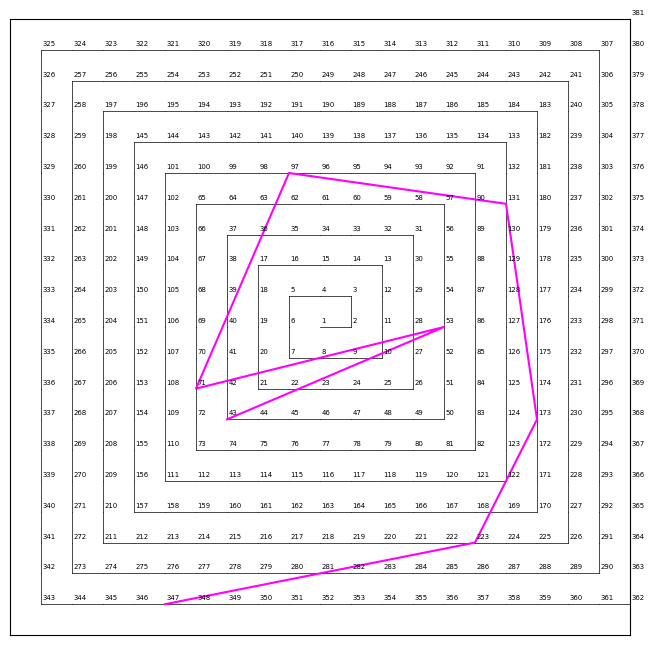

In [202]:

b,c=-2,41
fdense = lambda x: 4*x**2 + b*x + c
ints41 = [fdense(i) for i in range(1,10) if fg(i)>0]
print_diag_sample (fdense, "magenta")

# a diag in this spiral
b,c = -2,1
fg = lambda i: 4*i**2 - 2*i + 1
ints = [fg(i) for i in range(4,10) if fg(i)>0]
#print_diag_sample (fg, "green")

# a diag in this spiral
b,c=6,1
fr = lambda x: 4*x**2 + b*x + c
ints2 = [fr(i) for i in range(4,10) if fr(i)>0]
#print_diag_sample (fr, "red")



## Got to get this to label correctly
ax,x,y = make_integer_spiral(N=38,bound=10,size=5,linewidth=.5)
coords = zip(x,y)

# add diagonals
ddm = {i:pt for (i,pt) in enumerate(coords,start=1)}
#to_do = [(ints,"green"), (ints2, "red"), (ints41,"magenta"),]
to_do = [(ints41,"magenta"),]
for (ends,col) in to_do:
    filtered_x, filtered_y = zip(*[ddm[i] for i in ends])
    ax.plot(filtered_x,filtered_y,color=col)

Instead for this value of $c$, we must shift the entire spiral,
starting with 41, shown at the origin here:

Tier | Diagonal Elem (magenta)
1    |          43
2    |          53
3    |          71
4    |          97
5    |         131
6    |         173
7    |         223
8    |         281
9    |         347


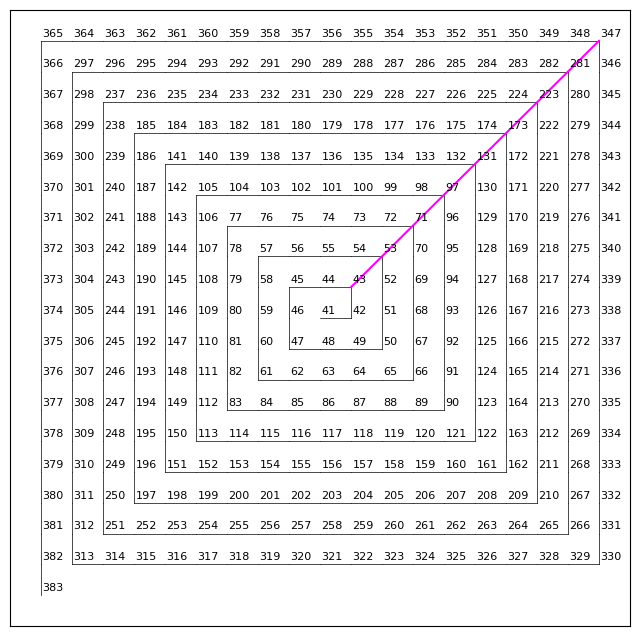

In [198]:
# not a diag in this spiral
#b,c = -2,1
#fg = lambda i: 4*i**2 - 2*i + 1
#ints = [fg(i) for i in range(4,10) if fg(i)>0]
#print_diag_sample (fg, "green")

# not a diag in this spiral
#b,c=6,1
#fr = lambda x: 4*x**2 + b*x + c
#ints2 = [fr(i) for i in range(4,10) if fr(i)>0]
#print_diag_sample (fr, "red")


b,c=-2,41
fdense = lambda x: 4*x**2 + b*x + c
ints41 = [fdense(i) for i in range(1,10) if fg(i)>0]
print_diag_sample (fdense, "magenta")

## Got to get this to label correctly
spiral_shift= 41
ax,x,y = make_integer_spiral(N=36,ctr=spiral_shift,linewidth=.5)
coords = zip(x,y)

# add diagonals
ddm = {i:pt for (i,pt) in enumerate(coords,start=spiral_shift)}
#to do = [(ints,"green"), (ints2, "red"), (ints41,"magenta"),]
to_do = [(ints41,"magenta"),]
for (ends,col) in to_do:
    filtered_x, filtered_y = zip(*[ddm[i] for i in ends])
    ax.plot(filtered_x,filtered_y,color=col)

In [ ]:
# Executed above
#b,c=-2,41
#fdense = lambda x: 4*x**2 + b*x + c
#N=10_000
#yd_m2_41=[f(i) for i in range(N) if is_prime(f(i))]
#print(len(yd_m2_41), len(yd_m2_41)/N)

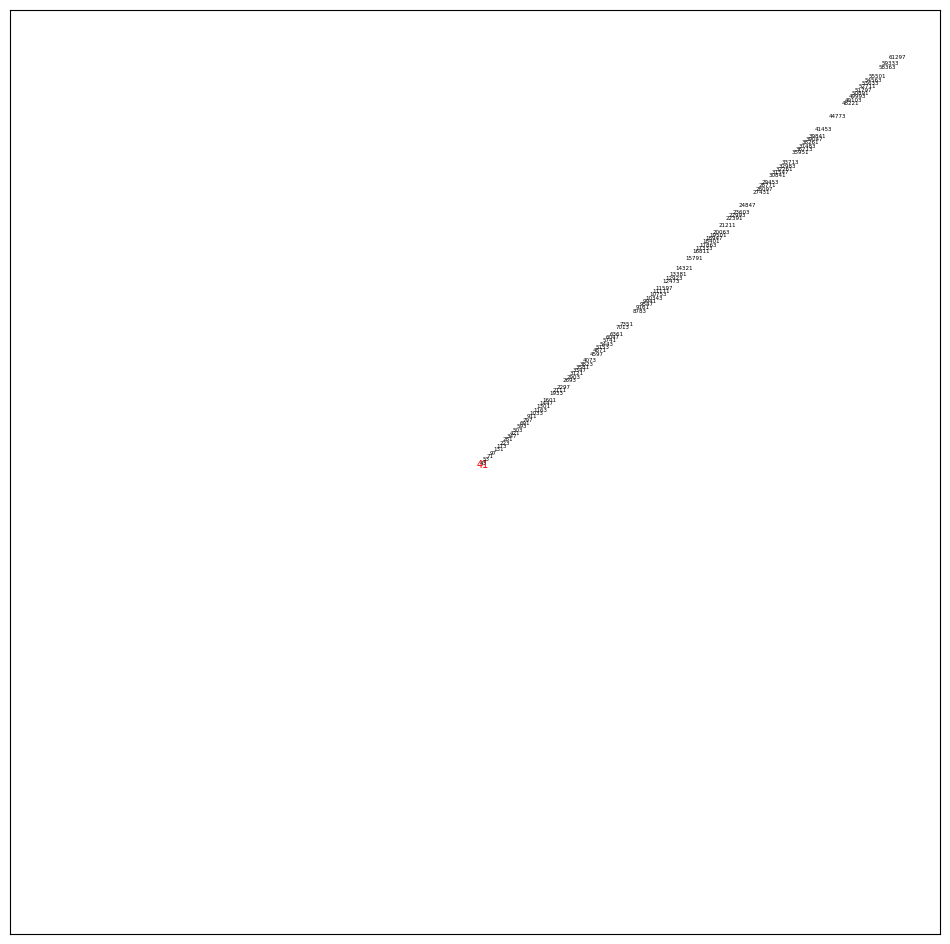

In [27]:
#fval_test = lambda x: x in yd_m2_41


#x,y = zip(*ulams_spiral(500,ctr=41,make_grid=True))
#lim=140
#ax = set_up_axis (xmin=-lim,xmax=lim,ymin=-lim,ymax=lim,figsize=(12,12))
#for (i,x_crd) in enumerate(x[:100_000]):
#    if fval_test(i+41):
#        color = "k"
#        if i == 0:
#            color="r"
#            size=7
#        else:
#            size=4
#        ax.annotate(f"{i+41}",xy=(x_crd,y[i]),xytext=(1,3),size=size,textcoords="offset points",color=color)
    

A close up with just a few points, to show that the relevant diagonal is just off a main diagonal of the square.

In [245]:
N2n(200)

10101

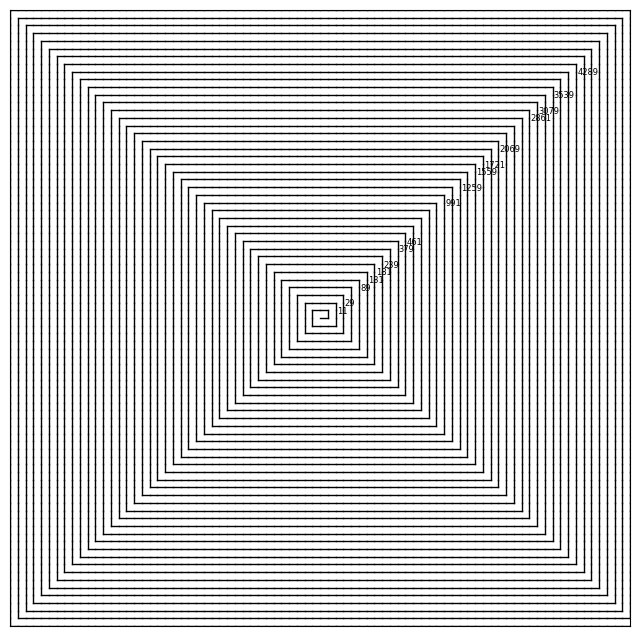

In [128]:
f3 = lambda x: 4*x**2 + 6*x + 1
f3_vals = [f3(x) for x in range(10_000) if is_prime(f3(x))]
f3val_test = lambda x: x in f3_vals

#mins (N=85, bound=22,size=6, figside= 8, test = euclid_test)
ax,_x,_y = make_integer_spiral(N=200, bound=40,size=6, figside= 8, test = f3val_test)

## Visualization: Start with 41 (as suggested in the Wikipedia article)

Starting the spiral sequence with 41, we get some really long diagonals that consist of long sequences of primes.  Note in particular the long rightward lkeanuing diagonal that passes through 41 (located at the "origin" in red).

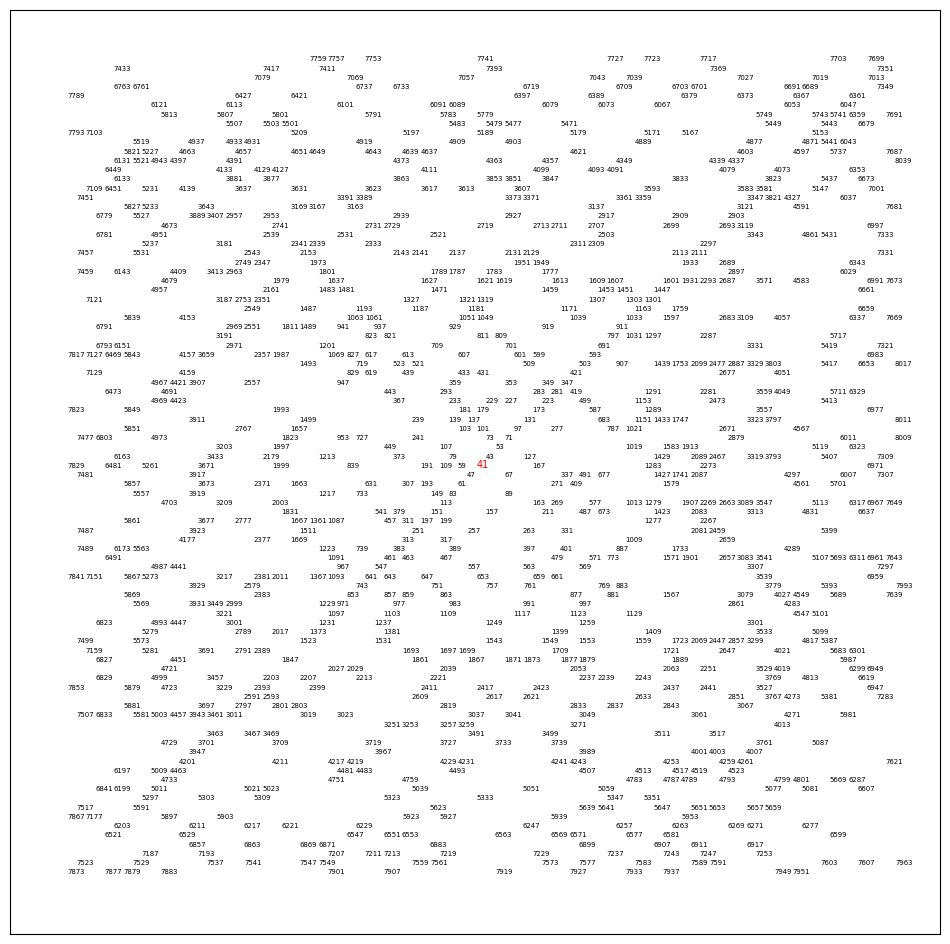

In [249]:

coords = ulams_spiral(200,ctr=41,make_grid=True)
lim=50
ax = set_up_axis (xmin=-lim,xmax=lim,ymin=-lim,ymax=lim,figsize=(12,12))
for (i,coord) in enumerate(coords[:8_000]):
    if is_prime(i+41):
        if i == 0:
            color="r"
            size=7
        else:
            size=5
            color = "k"
        ax.annotate(f"{i+41}",xy=coord,xytext=(1,3),size=size,textcoords="offset points",color=color)

## Appendix

####  Computing the number of points generated as a function of N (the number of arms)

The number of point generated is the last integer generated, 241 in the case of N=30,
170, when N= 25, 111 when N=20

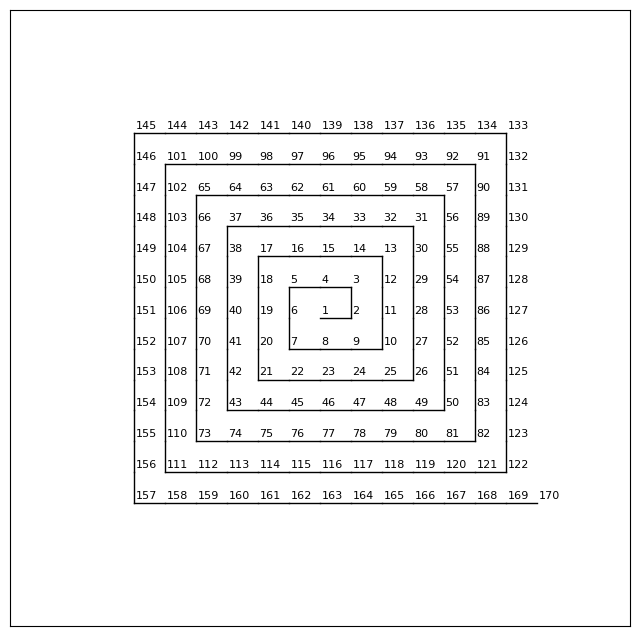

In [219]:
ax,x,y = make_integer_spiral(N=25)

In [244]:
N=33
print(N2n(N),len(ulams_spiral(N,make_grid=True)))

290 290


In [ ]:
ulams_spiral(N,make_grid=True)

In [ ]:
2 + 2 

In [ ]:
# n2N: inverse of N2n
# Obs N2n(N) = round(f(N))

In [4]:
#g(i) = i^2 - (i-1)
g = lambda i: i**2 -(i-1)
h = lambda N: (N/2 + 1)

In [5]:
N2n(8),g(5),g(h(8))

(21, 21, 21.0)

Inspecting the Ulam spiral above we see that the upper left corner of every tier is always 1 more than a perfect
square.  The even perfect squares fall on arms numbered N where $N\equiv 3 \mod 4$. To compute the last integer of the preceding arm we subtract an odd number depending on N.  The even square on arm N is the  (N)th even perfect square and we subtract the (N-1)-th odd number.

Rephrasing this: Let N be even and let N be the $i$-th even number (with 0 as the first). We can compute $n$ (the number of points generated) from N (the number of arms) using the function $g$:

$$
g(i) = i^2 - (i-1) = = i^2 -i +1
$$

To make this a function of $N$ we observe that

$$
h(N) = N/2 + 1
$$

The function $h$ tells us, for any even number $N$, what its position in the sequence of even numbers is: $h(6) = 4$, meaning 6 is the 4th even number (using 0-based indexing).  Then 

$$
g \circ h (N) = g(h(N)) = (N/2+1)^2 - (N/2 + 1) + 1 = (N/2+1)^2 - N/2.
$$

We have defined an iterative function `N2n` that computes the number of points generated `n` for the number of arm `N`. We'll use that to check pur results:

In [2]:

f = lambda n: (n/2 + 1)**2 - (n/2)
N2n(6),f(6)

(13, 13.0)

In [250]:
f = lambda n: (n/2 + 1)**2 - (n/2)
#for N in range(2,24,2):
for N in range(1,24):
    x,y = zip(*ulams_spiral(N,make_grid=True))
    print(f"{N:>2}  {len(x):>3} {round(f(N)):>5.1f} {N2n(N):>5.1f}")

 1    2   2.0   2.0
 2    3   3.0   3.0
 3    5   5.0   5.0
 4    7   7.0   7.0
 5   10  10.0  10.0
 6   13  13.0  13.0
 7   17  17.0  17.0
 8   21  21.0  21.0
 9   26  26.0  26.0
10   31  31.0  31.0
11   37  37.0  37.0
12   43  43.0  43.0
13   50  50.0  50.0
14   57  57.0  57.0
15   65  65.0  65.0
16   73  73.0  73.0
17   82  82.0  82.0
18   91  91.0  91.0
19  101 101.0 101.0
20  111 111.0 111.0
21  122 122.0 122.0
22  133 133.0 133.0
23  145 145.0 145.0


In [6]:
N2n(8),h(8),g(5),g(h(8))

(21, 5.0, 21, 21.0)

Of course this only returns an integer for even numbers.  But for odd numbers, it can simply be rounded
to the correct value:

In [7]:
f = lambda n: (n/2 + 1)**2 - (n/2)
#for N in range(2,24,2):
for N in range(1,24):
    x,y = zip(*ulams_spiral(N,make_grid=True))
    print(f"{N:>2}  {len(x):>3} {round(f(N)):>5.1f} {N2n(N):>5.1f}")

 1    2   2.0   2.0
 2    3   3.0   3.0
 3    5   5.0   5.0
 4    7   7.0   7.0
 5   10  10.0  10.0
 6   13  13.0  13.0
 7   17  17.0  17.0
 8   21  21.0  21.0
 9   26  26.0  26.0
10   31  31.0  31.0
11   37  37.0  37.0
12   43  43.0  43.0
13   50  50.0  50.0
14   57  57.0  57.0
15   65  65.0  65.0
16   73  73.0  73.0
17   82  82.0  82.0
18   91  91.0  91.0
19  101 101.0 101.0
20  111 111.0 111.0
21  122 122.0 122.0
22  133 133.0 133.0
23  145 145.0 145.0


Let's try a large odd number and test equivalence with our iterative definition if N2n:

In [268]:
N=2_145_157
f = lambda n: (n/2 + 1)**2 - (n/2)
N2n(N),round(f(N))

(1150425711242, 1150425711242)

With all this in mind, Let's try to define the inverse of N2 using the inverse of f.

$$
\begin{array}{lcll}
n & = & (N/2+1)^2 - N/2 &=& N^2/4 + N + 1 - N/2\\
  & = & N^2/4 + N/2 + 1\\
0 & = & N^2/4 + N/2 + 1 -n \\
  & = & N^2 + 2N+ 4(1 -n) \\
\end{array}
$$

If we apply the quadratic formula to solve for $N$, we find
$$
N = -1 \pm \sqrt{-3 + 4n}
$$

We will use only the positive solutions.

Checking some of the above n-values corresponding to even N:

In [8]:
f = lambda n: (n/2 + 1)**2 - (n/2)
f_inv = lambda n: -1 + np.sqrt(4*n -3)
#for n in (7,21,31,133):
banner = " N    f(N)  f_inv(n)"
print(banner)
print("="*len(banner))
for N in (4,8,10,22):
    n=N2n(N)
    print(f"{N:>2}   {n:>5}   {f_inv(n):>4.1f}   ")

 N    f(N)  f_inv(n)
 4       7    4.0   
 8      21    8.0   
10      31   10.0   
22     133   22.0   


Now try f_inv on the f(N)s for some odd Ns:

In [9]:
def N2n_closed_form(N):
    return round(-1 + np.sqrt(4*N -3))

#for n in (7,21,31,133):
banner = " N      f(N)  f_inv(n)     Rded  "
print(banner)
print("="*len(banner))
for N in range(1,24,2):
#for N in range(24):
    n=N2n(N)
    print(f"{N:>2}   {n:>6.2f}   {f_inv(n):>8.4f}    {N2n_closed_form(n):>5.1f}  ")

 N      f(N)  f_inv(n)     Rded  
 1     2.00     1.2361      1.0  
 3     5.00     3.1231      3.0  
 5    10.00     5.0828      5.0  
 7    17.00     7.0623      7.0  
 9    26.00     9.0499      9.0  
11    37.00    11.0416     11.0  
13    50.00    13.0357     13.0  
15    65.00    15.0312     15.0  
17    82.00    17.0278     17.0  
19   101.00    19.0250     19.0  
21   122.00    21.0227     21.0  
23   145.00    23.0208     23.0  


Note that f_inv computes a better and better approximation of N as  $n$ grows larger; it never overshoots by more than .5, so rounding makes it exact.  This will be our definition of `N2n_closed_form`

In [79]:
# if N is odd, m(the number of points generated) is 1 more than a perfect square
# Rule: if N is the nth odd number, m = n^2 + 1
# i.e., m = ((N+1)/2)**2 + 1
for N in range(3,21,2):
    x,y = zip(*ulams_spiral(N,make_grid=True))
    print(f"{N:>2}   {len(x):>3}  {((N+1)/2)**2 + 1:>4.0f}")

 3     5     5
 5    10    10
 7    17    17
 9    26    26
11    37    37
13    50    50
15    65    65
17    82    82
19   101   101


In [103]:
f(200)

10101.0

In [104]:
f(1_000)

250501.0

To get to n=400,000,000 (as in the calculation above) we need

In [89]:
print(f"{f(40_000):,}")

400,020,001.0


In [56]:
ax

<Axes: >

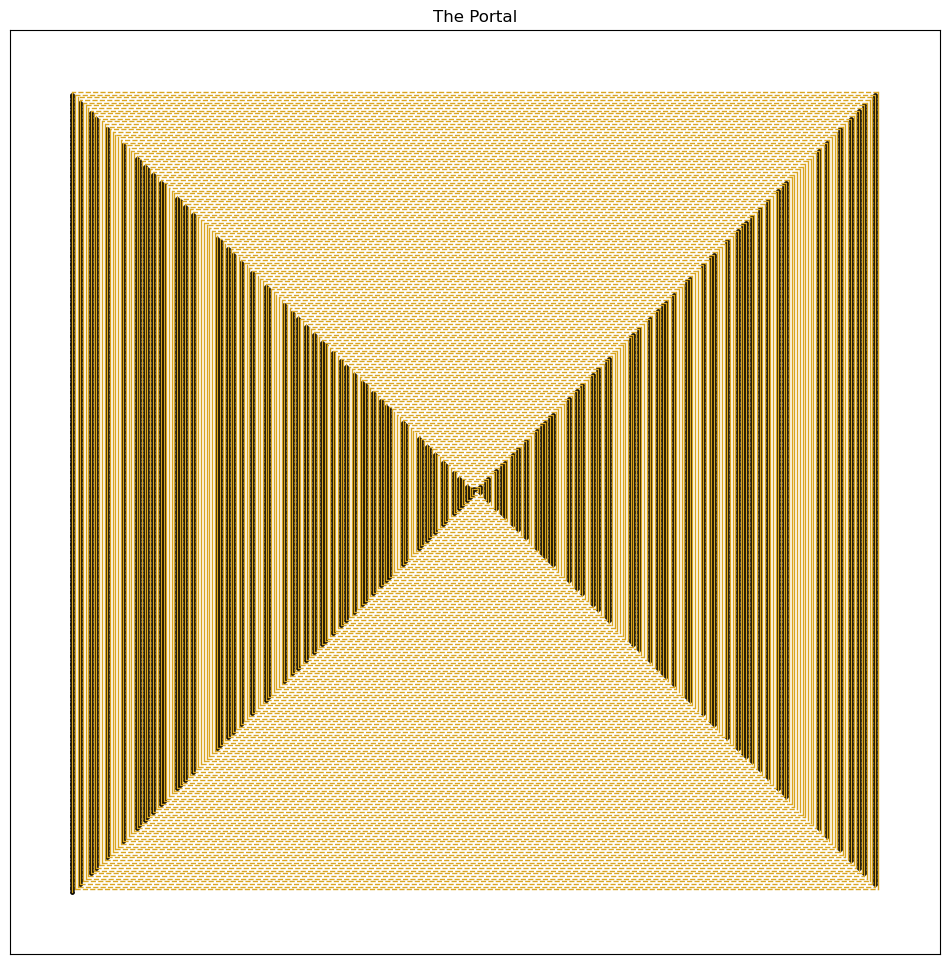

In [58]:

N=600

#pretty_picture(N=N,c="k",s=6,lw=1,F=2)
ax = pretty_picture(N=N,c="goldenrod",s=6,lw=1,F=2)
_ = ax.set_title("The Portal")